# Simulation Tests

This notebook introduces how this project examines and evaluates the aperiodic methods using simulations.

## Overview

In the simulation method tests, each method is examined independently, and applied to simulated data, to evaluate it's performance across plausible parameter variations.

Where possible, simulation testing includes estimating the accuracy of each method. For example, the accuracy of methods that estimate 1/f exponents can be evaluated on data simulated to have particular characteristics, and the same can be done for measures that have analytical solutions for expected values on certain kinds of data. In other cases, the analytically expected results are unknown, in which case the simulations are used to characterize how the measures relate to variations across parameters of the simulated data. 

## Simulations

We use simulated data that systematically varies across parameters of interest to characterize the methods.

### Aperiodic Variations

Calculate measures on simulated signals, across variations of aperiodic parameters.

Parameter sweeps include:
- variation of aperiodic exponent of powerlaw signals
- variation of aperiodic exponent of powerlaw signals with an oscillation present

### Periodic Variations

Calculate measures on simulated combined signals, with an oscillation and powerlaw components, across variations of oscillatory parameters.

Parameter sweeps include:
- variation of oscillation frequency
- variation of oscillation power

## Code Approach

Here, we will briefly introduce the general strategy and code used to run the simulations. 

### run_sims

The overarching function used to run simulations in this section is `run_sims`. 

This approach allows for:
- defining a procedure to simulate time series
- defining a measure of interest to apply to the simulated time series
- applying this measure across simulated instances, sweeping across parameter ranges

In [1]:
import numpy as np

from neurodsp.sim import sim_powerlaw
from neurodsp.plts.time_series import plot_multi_time_series
from neurodsp.utils import set_random_seed

In [2]:
# Import `run_sims` and helper functions from the custom code folder
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB, load_pickle
from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import EXT
from apm.sim.settings import SIM_PARAMS_AP

In [3]:
# Set plot style
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set random seed
set_random_seed(111)

In [5]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '13_sim_tests'

In [6]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Running simulation tests with `run_sims`

In [7]:
# Check the documentation for `run_sims`
print(run_sims.__doc__)

Compute a measure of interest across a set of simulations.

    Parameters
    ----------
    sim_func : callable
        A function to create the simulations from.
    sim_params : dict
        Input arguments for `sim_func`.
    measure_func : callable
        A measure function to apply to the simulated data.
    measure_params : dict
        Input arguments for `measure_func`.
    update : {'update_exp', 'update_freq', 'update_pow', 'update_comb_exp'} or callable
        Specifies which parameter to update in simulation parameters.
    values : list or 1d array
        Parameter values to step across and re-run measure calculations for.
    n_sims : int
        The number of iterations to simulate and calculate measures, per value.

    Returns
    -------
    measures : 1d array
        The results of the measures applied to the set of simulations.
    


Next, we can run an example of using `run_sims`.

To do so, we will define an example analysis to apply a measure of interest (here, variance) across some simulations of 1/f (powerlaw) data.

In [8]:
# Define settings for simulation
exponents = [1, 1.5, 2]
n_sims = 2

In [9]:
# Check the predefined default settings for the simulation
SIM_PARAMS_AP

{'n_seconds': 30, 'fs': 250, 'f_range': (0.5, None)}

In [10]:
# Run simulations across different aperiodic exponents
results = run_sims(sim_powerlaw, SIM_PARAMS_AP, np.mean, {}, 'update_exp', exponents, n_sims)

### Evaluating Results

After computing the measures, we can examine the results, across different simulation parameters.

Where possible, we also evaluate the accuracy of the computed measures given the expected answer based on the simulated parameters.

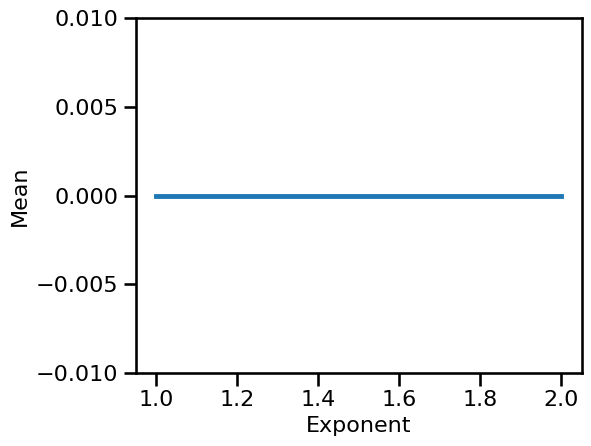

In [11]:
# Plot the computed measures across the different simulation parameters
plot_lines(exponents, np.mean(results, 1), np.std(results, 1),
           ylim=[-0.01, 0.01], xlabel='Exponent', ylabel='Mean')

Note that in our example case, computing the signal mean, the simulated signals are normalized such that they all have a mean of 0. 

## Check Precomputed Simulations

In [12]:
# Set which sims file to load
sims_file = 'ts_sims_ap_exp'

In [13]:
# Load file
data = load_pickle(sims_file, SIMPATH)

In [14]:
# Get the condition labels
labels = list(data.keys())

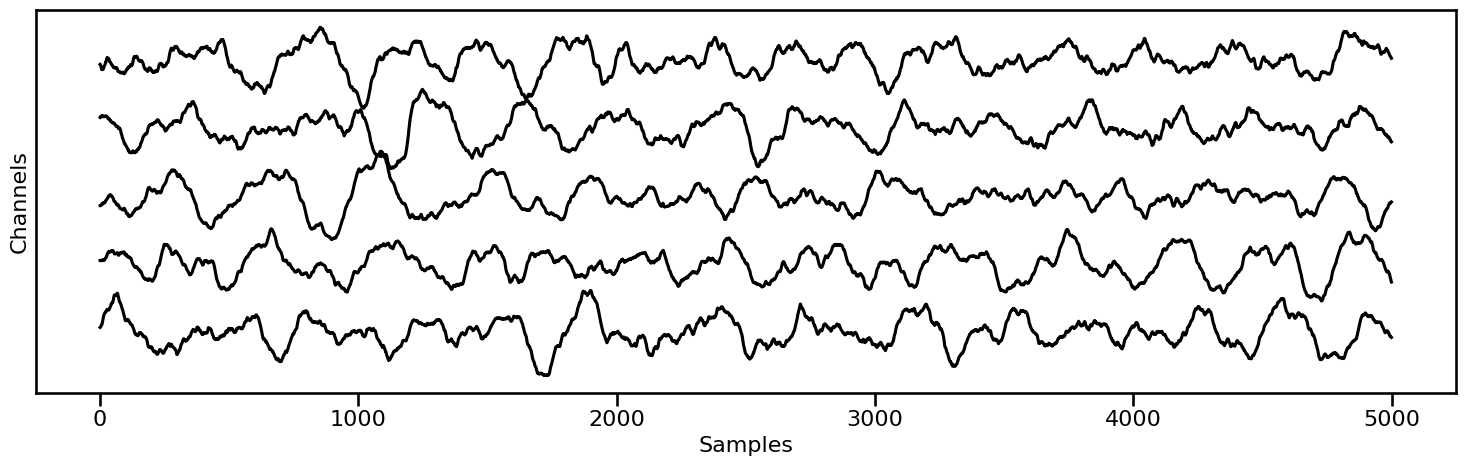

In [15]:
# Plot example segments from the first condition
plot_multi_time_series(None, data[labels[0]][0:5, 0:5000], 
                       save_fig=SAVE_FIG, file_name='time_series1' + EXT, file_path=FIGPATH)

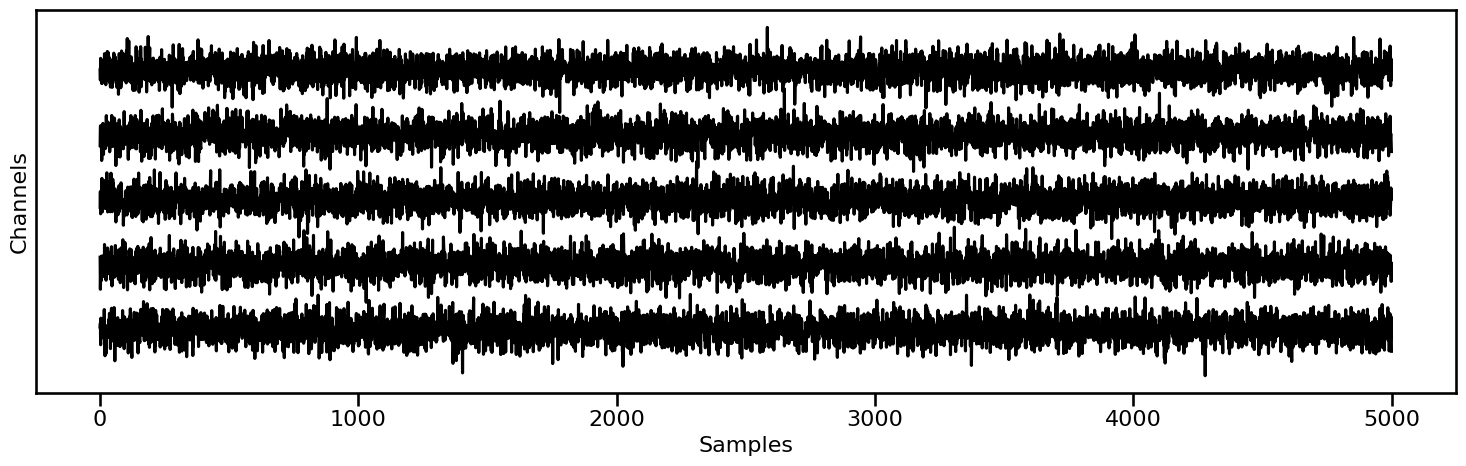

In [16]:
# Plot example segments from the last condition
plot_multi_time_series(None, data[labels[-1]][0:5, 0:5000],
                       save_fig=SAVE_FIG, file_name='time_series2' + EXT, file_path=FIGPATH)